In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import statsmodels.api as sm

C:\Users\leona\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
Datos=pd.read_excel('Datos_ExParcialFII.xlsx')
Datos2=pd.read_excel('Datos_ExParcialFII.xlsx',sheet_name="Datos2")

##  Estimación de los rendimientos

In [3]:
Bonos=['M-161215','S-171214']
Fun_Eri=lambda col:Datos[col].mean()*360 if col in Bonos else Datos[col].mean()*252
Fun_sigI=lambda col:Datos[col].std()*sqrt(len(Datos[col])*360/(len(Datos[col])+1)) if col in Bonos else Datos[col].std()*sqrt(len(Datos[col])*252/(len(Datos[col])+1))
Eri=list(map(Fun_Eri,Datos.columns[1:]))
Sigri=list(map(Fun_sigI,Datos.columns[1:]))
Eri_dia=[Eri[i]/360 if i==7 or i ==8 else  Eri[i]/252 for i in range(len(Eri))]
Sigri_dia=[Sigri[i]/sqrt(360) if i==7 or i ==8 else  Sigri[i]/sqrt(252) for i in range(len(Sigri))]
Eri_Sigi_Dia=pd.DataFrame({"E(ri)":Eri_dia,"Sig(i)":Sigri_dia})
Eri_Sigi_Dia=Eri_Sigi_Dia.T
Eri_Sigi=pd.DataFrame({"E(ri)":Eri,"Sig(i)":Sigri})
Eri_Sigi=Eri_Sigi.T
Eri_Sigi_Dia=Eri_Sigi_Dia.rename(columns={Eri_Sigi_Dia.columns[i]:Datos.columns[1:][i] for i in Eri_Sigi_Dia.columns})
Eri_Sigi=Eri_Sigi.rename(columns={Eri_Sigi.columns[i]:Datos.columns[1:][i] for i in Eri_Sigi.columns})
print("Estimación Diaria:")
print(Eri_Sigi_Dia)
print("\n")
print("Estimación Anualizada:\n")
Eri_Sigi

Estimación Diaria:
          BIMBOA      ICA*  FEMSAUBD  MEXCHEM*  TLEVISACPO       DIS  \
E(ri)   0.000528 -0.000355  0.000937  0.001323    0.000157  0.000754   
Sig(i)  0.015893  0.020145  0.014510  0.016497    0.015033  0.014077   

             MCD  M-161215  S-171214     BRENT       GBP  
E(ri)   0.000673  0.000332  0.000386  0.000474  0.000011  
Sig(i)  0.010168  0.002311  0.002409  0.015915  0.007156  


Estimación Anualizada:



,BIMBOA,ICA*,FEMSAUBD,MEXCHEM*,TLEVISACPO,DIS,MCD,M-161215,S-171214,BRENT,GBP
E(ri),0.133088,-0.089489,0.236219,0.333350,0.039520,0.189953,0.169470,0.119361,0.138988,0.119362,0.002801
Sig(i),0.252293,0.319790,0.230343,0.261875,0.238647,0.223460,0.161409,0.043853,0.045704,0.252636,0.113598


In [4]:
def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

## Histogramas de los rendimientos

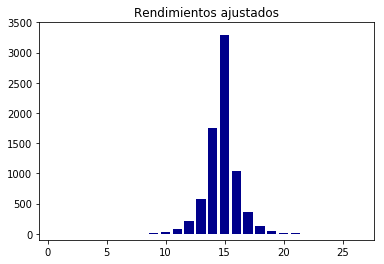

In [5]:
Minimos=[Datos[i].min() for i in Datos.columns[1:]]
Maximos=[Datos[i].max() for i in Datos.columns[1:]]
Min_global=min(Minimos)
Max_global=max(Maximos)
Inter=abs(Min_global-Max_global)
Intervalos=[(Min_global,Min_global+Inter/26)]
for  i in range(25):
    a=Intervalos[-1][-1]
    b=a+Inter/26
    Intervalos.append((a,b))
def count_interv(a,b): return sum([len(np.where((a<Datos[i])&(Datos[i]<b))[0]) for i in Datos.columns[1:]])
Y_hist=[]
for a,b in Intervalos:
    Y_hist.append(count_interv(a,b))
plt.bar(np.arange(1,27),Y_hist,color="darkblue")
plt.title("Rendimientos ajustados")
plt.ylim(-100,3500);

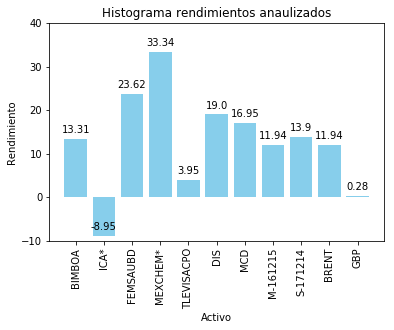

In [6]:
x=np.linspace(0,10,11)
y=[round(Eri[c]*100,2) for c in range(len(Eri))]
fig=plt.bar(x,y,color="skyblue")
plt.title("Histograma rendimientos anaulizados")
plt.xlabel("Activo")
plt.ylabel("Rendimiento")
plt.ylim(-10,40)
plt.xticks(np.arange(0,11),Eri_Sigi.columns)
plt.tick_params(axis="x",labelrotation =90 )
autolabel(fig)
plt.rcParams["figure.figsize"] =[9, 6]
plt.show()

## Matrices volatilidades, varianzas y covarianzas

In [7]:
#Matrices
Matriz_Si=[[0]*11 for i in range(11)]
for i,s_i in zip(range(len(Matriz_Si)),range(len(Sigri))):
                Matriz_Si[i][s_i]=Sigri[s_i]
Matriz_Si

[[0.2522925721551176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0.3197900287768997, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0.23034260392487804, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0.26187517732071086, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0.23864690347320583, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0.22345998521500804, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0.16140865282259093, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0.0438528575592172, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0.04570433783658385, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25263614476434165, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11359838736729849]]

In [8]:
Matriz_Si=np.array(Matriz_Si)
Matrizcorr=Datos.corr()
MVC=Matriz_Si@Matrizcorr@Matriz_Si.T;MVC

,0,1,2,3,4,5,6,7,8,9,10
0,0.063652,0.028163,0.014741,0.029362,0.018543,0.017171,0.004649,0.000595,-0.000316,0.011793,-0.006709
1,0.028163,0.102266,0.025299,0.038893,0.027803,0.025019,0.004659,0.001268,0.000999,0.019958,-0.012185
2,0.014741,0.025299,0.053058,0.020739,0.018997,0.014519,0.004603,0.001365,0.001356,0.009038,-0.002331
3,0.029362,0.038893,0.020739,0.068579,0.026896,0.019694,0.003146,0.001420,0.000909,0.013379,-0.009481
4,0.018543,0.027803,0.018997,0.026896,0.056952,0.019936,0.007097,0.000051,-0.000326,0.014229,-0.005316
5,0.017171,0.025019,0.014519,0.019694,0.019936,0.049934,0.013835,-0.000186,-0.000939,0.015333,-0.006361
6,0.004649,0.004659,0.004603,0.003146,0.007097,0.013835,0.026053,-0.000315,-0.000685,0.010770,0.000571
7,0.000595,0.001268,0.001365,0.001420,0.000051,-0.000186,-0.000315,0.001923,0.001363,-0.000451,-0.000254
8,-0.000316,0.000999,0.001356,0.000909,-0.000326,-0.000939,-0.000685,0.001363,0.002089,-0.001523,-0.000168
9,0.011793,0.019958,0.009038,0.013379,0.014229,0.015333,0.010770,-0.000451,-0.001523,0.063825,-0.002900


In [9]:
MVCA=MVC
MVCA.loc[11]=[1]*11
MVCA=MVCA.T
MVCA.loc[11]=[1]*11+[0]
MVCA=MVCA.T
MVCA_inv=np.linalg.inv(MVCA)
MVCAA=MVCA
MVCAA.loc[12]=Eri+[0]
MVCAA=MVCAA.T
MVCAA.loc[12]=Eri+[0,0]
MVCAA=MVCAA.T
MVCAA

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.063652,0.028163,0.014741,0.029362,0.018543,0.017171,0.004649,0.000595,-0.000316,0.011793,-0.006709,1.0,0.133088
1,0.028163,0.102266,0.025299,0.038893,0.027803,0.025019,0.004659,0.001268,0.000999,0.019958,-0.012185,1.0,-0.089489
2,0.014741,0.025299,0.053058,0.020739,0.018997,0.014519,0.004603,0.001365,0.001356,0.009038,-0.002331,1.0,0.236219
3,0.029362,0.038893,0.020739,0.068579,0.026896,0.019694,0.003146,0.001420,0.000909,0.013379,-0.009481,1.0,0.333350
4,0.018543,0.027803,0.018997,0.026896,0.056952,0.019936,0.007097,0.000051,-0.000326,0.014229,-0.005316,1.0,0.039520
5,0.017171,0.025019,0.014519,0.019694,0.019936,0.049934,0.013835,-0.000186,-0.000939,0.015333,-0.006361,1.0,0.189953
6,0.004649,0.004659,0.004603,0.003146,0.007097,0.013835,0.026053,-0.000315,-0.000685,0.010770,0.000571,1.0,0.169470
7,0.000595,0.001268,0.001365,0.001420,0.000051,-0.000186,-0.000315,0.001923,0.001363,-0.000451,-0.000254,1.0,0.119361
8,-0.000316,0.000999,0.001356,0.000909,-0.000326,-0.000939,-0.000685,0.001363,0.002089,-0.001523,-0.000168,1.0,0.138988
9,0.011793,0.019958,0.009038,0.013379,0.014229,0.015333,0.010770,-0.000451,-0.001523,0.063825,-0.002900,1.0,0.119362


## CMR

In [10]:
def sigmaW(Porc_w): return sqrt(Porc_w.T@np.array(MVC[:-1])@Porc_w)
Vector_B=np.array([0]*11+[1]).reshape(12,1)
W_min_riesgo=MVCA_inv@Vector_B
E_wmin=(W_min_riesgo[:-1].T*Eri).sum()
Sig_wmin=sigmaW(W_min_riesgo[:-1])

In [11]:
print(W_min_riesgo[:-1])
E_wmin,Sig_wmin

[[ 0.01599172]
 [ 0.00263481]
 [-0.01615642]
 [ 0.00052196]
 [ 0.01610619]
 [ 0.0266516 ]
 [ 0.03024463]
 [ 0.38449522]
 [ 0.38297967]
 [ 0.02009852]
 [ 0.13643208]]


(0.11097936010040267, 0.0345800810980873)

## Comparación porcentaje teorico vs real 

In [12]:
Monto_disp=1_000_000
Precios_Ult=[31.06,24.39,118.1,60.95,59.46,52.74,93.71,111.004273,549.953707,112.39,20.869]
Porcent_teorioco=Monto_disp*W_min_riesgo[:-1]
Uni_invert_Teorico=[abs(Por_ter/Pe_ult) for Por_ter,Pe_ult in zip(Porcent_teorioco,Precios_Ult)]
Uni_invert_Real=[int(u) for u in Uni_invert_Teorico]
Difere_prom=[Ute-Ure for Ute,Ure in zip(Uni_invert_Teorico,Uni_invert_Real)]
Remanente=np.array(Difere_prom).T*np.array(Precios_Ult)
Monto_Real=[UiR*Pu for UiR,Pu in zip(Uni_invert_Real,Precios_Ult)]
Wreal=[MR/Monto_disp for MR in Monto_Real]
print('Las unidades a invertir reales son:')
print(Uni_invert_Real)
print(f"El remanente es de: {Remanente.sum()}")


Las unidades a invertir reales son:
[514, 108, 136, 8, 270, 505, 322, 3463, 696, 178, 6537]
El remanente es de: 700.5124468931177


In [13]:
# g. NOTA: para este ejemplo wi teórico≈ wi real≈0.168 ¿Ocurre esto para todos
# wi los de tu portafolio?
[(a[0],b) if a[0]>0 else (a[0],-b) for a,b in zip(W_min_riesgo[:-1],Wreal)]

[(0.015991724769643917, 0.01596484),
 (0.002634812874244184, 0.0026341199999999998),
 (-0.016156421458946513, -0.0160616),
 (0.0005219617563974582, 0.00048760000000000003),
 (0.01610619130873591, 0.0160542),
 (0.02665160327502225, 0.0266337),
 (0.030244630862184457, 0.03017462),
 (0.3844952230685128, 0.384407797399),
 (0.38297967136283084, 0.382767780072),
 (0.020098524413007347, 0.020005420000000003),
 (0.13643207776836744, 0.136420653)]

### Creando 50 carteras 
* rendimientos desde 0.01 hasta 1.50

In [14]:
Matriz_PondWi=[]
for x in np.linspace(0.01,1.5,50):
    Matriz_PondWi.append([0]*11+[1,x])
Matriz_PondWi=np.array(Matriz_PondWi).T
MVCAA_inv=np.linalg.inv(MVCAA)
Carteras_50=pd.DataFrame(MVCAA_inv@Matriz_PondWi)
Carteras_50=Carteras_50[:11]
Carteras_50=Carteras_50.T
Carteras_50=Carteras_50.rename(columns={Carteras_50.columns[i]:Datos.columns[1:][i] for i in Carteras_50.columns})
Carteras_50=Carteras_50.T
Carteras_50=Carteras_50.rename(columns={Carteras_50.columns[i]:[f"Cartera {x}" for x in range(1,51)][i] for i in Carteras_50.columns})
Carteras_50

,Cartera 1,Cartera 2,Cartera 3,Cartera 4,Cartera 5,Cartera 6,Cartera 7,Cartera 8,Cartera 9,Cartera 10,...,Cartera 41,Cartera 42,Cartera 43,Cartera 44,Cartera 45,Cartera 46,Cartera 47,Cartera 48,Cartera 49,Cartera 50
BIMBOA,0.033607,0.028302,0.022998,0.017693,0.012389,0.007085,0.001780,-0.003524,-0.008829,-0.014133,...,-0.178570,-0.183874,-0.189178,-0.194483,-0.199787,-0.205092,-0.210396,-0.215700,-0.221005,-0.226309
ICA*,0.115862,0.081766,0.047669,0.013573,-0.020524,-0.054620,-0.088716,-0.122813,-0.156909,-0.191006,...,-1.247995,-1.282091,-1.316187,-1.350284,-1.384380,-1.418477,-1.452573,-1.486670,-1.520766,-1.554862
FEMSAUBD,-0.083861,-0.063473,-0.043085,-0.022697,-0.002309,0.018079,0.038467,0.058856,0.079244,0.099632,...,0.731663,0.752051,0.772439,0.792827,0.813215,0.833603,0.853991,0.874379,0.894767,0.915156
MEXCHEM*,-0.109007,-0.076024,-0.043041,-0.010059,0.022924,0.055906,0.088889,0.121872,0.154854,0.187837,...,1.210299,1.243282,1.276264,1.309247,1.342230,1.375212,1.408195,1.441178,1.474160,1.507143
TLEVISACPO,0.093268,0.070032,0.046796,0.023560,0.000324,-0.022912,-0.046148,-0.069383,-0.092619,-0.115855,...,-0.836169,-0.859405,-0.882641,-0.905876,-0.929112,-0.952348,-0.975584,-0.998820,-1.022056,-1.045292
DIS,0.003881,0.010738,0.017595,0.024452,0.031309,0.038166,0.045023,0.051879,0.058736,0.065593,...,0.278156,0.285013,0.291870,0.298727,0.305584,0.312441,0.319298,0.326154,0.333011,0.339868
MCD,-0.035708,-0.015847,0.004013,0.023873,0.043734,0.063594,0.083455,0.103315,0.123175,0.143036,...,0.758708,0.778568,0.798428,0.818289,0.838149,0.858009,0.877870,0.897730,0.917591,0.937451
M-161215,0.664767,0.580368,0.495969,0.411570,0.327171,0.242772,0.158373,0.073974,-0.010425,-0.094824,...,-2.711194,-2.795593,-2.879992,-2.964391,-3.048790,-3.133189,-3.217588,-3.301987,-3.386386,-3.470785
S-171214,-0.058724,0.074288,0.207299,0.340310,0.473321,0.606332,0.739344,0.872355,1.005366,1.138377,...,5.261725,5.394736,5.527747,5.660758,5.793770,5.926781,6.059792,6.192803,6.325814,6.458826
BRENT,0.012287,0.014639,0.016992,0.019344,0.021696,0.024049,0.026401,0.028753,0.031106,0.033458,...,0.106380,0.108733,0.111085,0.113437,0.115790,0.118142,0.120494,0.122847,0.125199,0.127551


## 50 carterlas aleatorias

In [15]:
def rendimientoW(wi):return (np.array(Eri)*wi).sum()
def Cart_2fondos(cartWi,num_alt): return num_alt*W_min_riesgo[:-1].T+(1-num_alt)*np.array(cartWi)
Vec_ran=np.random.random_sample(50)
CarterasAletorias=[Cart_2fondos(Carteras_50[cartera],num_alt) for cartera,num_alt in zip(Carteras_50,Vec_ran)]
Rendi_CartAlet=list(map(rendimientoW,CarterasAletorias))
Volatil_CarAlet=[sigmaW(CarterasAletorias[i][0]) for i in range(len(CarterasAletorias))]
Data_CartAlet=pd.DataFrame([list(CarterasAletorias[i][0])+[Rendi_CartAlet[i]]+[Volatil_CarAlet[i]] for i in range(len(CarterasAletorias))])
Data_CartAlet=Data_CartAlet.T
Data_CartAlet=Data_CartAlet.rename(columns={Data_CartAlet.columns[i]:[f"Cartera {x}" for x in range(1,51)][i] for i in Data_CartAlet.columns})
Data_CartAlet=Data_CartAlet.T
Names=list(Datos.columns[1:])+["Rendimiento","Volatilidad"]
Data_CartAlet=Data_CartAlet.rename(columns={Data_CartAlet.columns[i]:Names[i] for i in Data_CartAlet.columns})
Data_CartAlet=Data_CartAlet.T
Data_CartAlet

,Cartera 1,Cartera 2,Cartera 3,Cartera 4,Cartera 5,Cartera 6,Cartera 7,Cartera 8,Cartera 9,Cartera 10,...,Cartera 41,Cartera 42,Cartera 43,Cartera 44,Cartera 45,Cartera 46,Cartera 47,Cartera 48,Cartera 49,Cartera 50
BIMBOA,0.018882,0.016362,0.016415,0.017683,0.014605,0.007954,0.013182,0.003573,0.000180,0.010835,...,-0.067286,-0.139472,-0.153148,-0.028792,-0.020916,-0.092013,-0.017350,-0.107982,-0.186947,-0.057248
ICA*,0.021214,0.005017,0.005359,0.013506,-0.006281,-0.049030,-0.015427,-0.077195,-0.099000,-0.030510,...,-0.532668,-0.996676,-1.084586,-0.285233,-0.234608,-0.691613,-0.211681,-0.794263,-1.301844,-0.468148
FEMSAUBD,-0.027266,-0.017581,-0.017785,-0.022657,-0.010825,0.014737,-0.005356,0.031578,0.044616,0.003663,...,0.303930,0.581386,0.633952,0.155975,0.125704,0.398972,0.111995,0.460352,0.763862,0.265350
MEXCHEM*,-0.017450,-0.001782,-0.002113,-0.009995,0.009146,0.050500,0.017994,0.077744,0.098837,0.032584,...,0.518339,0.967190,1.052228,0.278986,0.230015,0.672092,0.207837,0.771389,1.262390,0.455926
TLEVISACPO,0.028767,0.017729,0.017962,0.023515,0.010031,-0.019102,0.003797,-0.038296,-0.053156,-0.006481,...,-0.348690,-0.664901,-0.724809,-0.180069,-0.145569,-0.457007,-0.129945,-0.526961,-0.872866,-0.304721
DIS,0.022915,0.026173,0.026104,0.024465,0.028445,0.037042,0.030284,0.042705,0.047091,0.033317,...,0.134302,0.227616,0.245294,0.084542,0.074362,0.166267,0.069751,0.186910,0.288986,0.121327
MCD,0.019423,0.028857,0.028658,0.023912,0.035438,0.060338,0.040765,0.076743,0.089445,0.049551,...,0.342046,0.612320,0.663526,0.197921,0.168433,0.434628,0.155079,0.494419,0.790074,0.304465
M-161215,0.430484,0.390391,0.391238,0.411406,0.362427,0.256608,0.339786,0.186893,0.132918,0.302452,...,-0.940543,-2.089104,-2.306707,-0.328065,-0.202754,-1.333979,-0.146003,-1.588070,-2.844488,-0.780835
S-171214,0.310502,0.373689,0.372354,0.340569,0.417759,0.584527,0.453440,0.694397,0.779460,0.512278,...,2.471213,4.281324,4.624262,1.505960,1.308472,3.091262,1.219034,3.491704,5.471794,2.219518
BRENT,0.018817,0.019934,0.019911,0.019348,0.020714,0.023663,0.021345,0.025606,0.027110,0.022385,...,0.057029,0.089042,0.095107,0.039959,0.036466,0.067995,0.034884,0.075077,0.110095,0.052578


## Creando la cartera tangente

In [16]:
rf=Datos2["CETES 28"].mean()
Rend_Exces=np.array(Eri)-rf
V_vector=np.linalg.inv(MVC[:-1])@Rend_Exces
W_tan=V_vector/V_vector.sum()
E_wtan=(W_tan*Eri).sum() #Del mercado
Sig_wtan=sigmaW(W_tan) #Del mercado
Fun_ErpT=lambda sigp:rf+(E_wtan-rf)*sigp/Sig_wtan

In [17]:
print('El vector V es:')
print(V_vector)
print('El vector Wtan es:')
print(W_tan)
print(f'El rendimiento del portafolio es: {E_wtan}')
print(f'La volatilidad del portafolio es: {Sig_wtan}')

El vector V es:
[ 1.87727035e-02 -5.06856348e+00  2.27533272e+00  5.06209013e+00
 -2.71267615e+00  2.42757014e+00  4.59880656e+00  7.03651735e+00
  4.01472929e+01  1.40040398e+00 -3.37564851e+00]
El vector Wtan es:
[ 3.62338165e-04 -9.78300218e-02  4.39169502e-02  9.77050775e-02
 -5.23582604e-02  4.68553350e-02  8.87630878e-02  1.35814151e-01
  7.74896191e-01  2.70296609e-02 -6.51545094e-02]
El rendimiento del portafolio es: 0.2005767812107431
La volatilidad del portafolio es: 0.054084484797169784


## Grafica CMR, FMV, Cartera tangente y CAL

In [18]:
def plot_CAL(ERP,sp,i):
    S=lambda Erp,sp:(Erp-i)/sp
    A=(sp,ERP)
    B=(0,i)
    m=(B[1]-A[1])/(B[0]-A[0])
    den=round(S(ERP,sp),4)
    vector=np.linspace(0,1,13)
    plt.plot(vector,[m*x+i for x in vector],label="CAL",color="darkred",linewidth=2,linestyle="dashed")

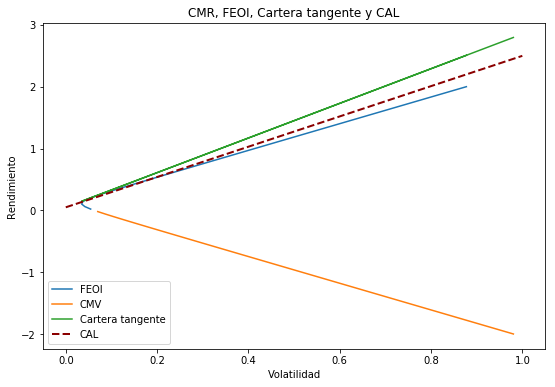

In [19]:

Matriz_PondWi2=[]
for x in np.linspace(-2,2,100):
    Matriz_PondWi2.append([0]*11+[1,x])
Matriz_PondWi2=np.array(Matriz_PondWi2).T
Carteras_100=pd.DataFrame(MVCAA_inv@Matriz_PondWi2)
Carteras_100=Carteras_100[:11]
Rendimintos100cart=[rendimientoW(Carteras_100[i]) for i in Carteras_100]
Volatilidades100cart=[sigmaW(Carteras_100[i])for i in Carteras_100]
E_T=list(map(Fun_ErpT,Volatilidades100cart))

plt.plot(Volatilidades100cart[50:],Rendimintos100cart[50:],label="FEOI")
plt.plot(Volatilidades100cart[:50],Rendimintos100cart[:50],label="CMV")
plt.plot(Volatilidades100cart,E_T,label='Cartera tangente')
plot_CAL(Rendimintos100cart[62],Volatilidades100cart[62],rf)
plt.title('CMR, FEOI, Cartera tangente y CAL')
plt.legend(loc='lower left')
plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.rcParams["figure.figsize"] =[9, 6]
plt.show()

## Cálculo de  $\beta$ para las carteras IPC y SB5 Banamex

In [20]:
CarteraIPC=Datos2.IPC[1:]
CareraSB5_Banamex=Datos2['SB5 BANAMEX'][1:]
def beta_RL(a,b):
    x,y=np.array(a),b
    X_train = sm.add_constant(x, prepend=True)
    modelo = sm.OLS(endog=y, exog=X_train,)
    modelo = modelo.fit()
    return modelo.params[1]

In [21]:
Betas_IPC=[beta_RL(CarteraIPC[:688],Datos[i][:688]) for i in Datos.columns[1:]]
Betas_SBanamex=[beta_RL(CareraSB5_Banamex[:688],Datos[i][:688]) for i in Datos.columns[1:]]
print('Las betas para la cartera IPC son:')
print(np.array(Betas_IPC).T)
print('Las betas para la cartera SB5 banamex son:')
print(np.array(Betas_SBanamex).T)

Las betas para la cartera IPC son:
[ 0.85109587  1.32898773  0.7738516   1.05346323  0.89067983  0.65353141
  0.1650981   0.02732982  0.01692636  0.5327089  -0.25696493]
Las betas para la cartera SB5 banamex son:
[-0.09233078  0.21019738  0.07243653  0.04357423 -0.05948834 -0.32558255
 -0.2991314   0.04644762  0.09523696 -0.23093171  0.09005103]


## Rendimientos esperados para el CAPM

In [22]:
BETAS_RL=Betas_IPC[:6]+Betas_SBanamex[6:]
def F_EriCAPM(Bi): return Bi*(E_wtan-rf)+rf
EriCAPM=[F_EriCAPM(b) for b in BETAS_RL];EriCAPM

[0.1780102468753534,
 0.25043512287237746,
 0.16630381743278466,
 0.208679174129786,
 0.1840092254376783,
 0.14806920105765783,
 0.003692423491509965,
 0.05606518766210233,
 0.0634592501155352,
 0.01402813869051115,
 0.06267331831714287]